###### simple and Multiple Linear Regression

Linear Regression will refers to one independent variable to make a prediction and similarly multiply linear regression will regers to multiple independent variables to make the prediction.


Simple Linear Regression is a method helps us to understand the relation between two variables.
The predictor (independent) variable - x and the target (dependent variable) y.

Linear relationship between x and y is:

   ######        y  = b0 + b1x
   
Here,
    b0 = the intercept
    b1 = the slope
    

######  Fitting a Simple Linear Model Estimator


* X: Predictor variable

* Y: Target variable


1. Import linear_model from scikit-learn
    
    from sklearn.linear_model import LinearRegression

2. Create a Linear Regression Object using the consturctor: 
    
    lm = LinearRegression()
    

3. We define the predictor variable and target variable

x = df[['highway-mpg']]

y = df['price']



4. Then use lm.fit(x,y) to fit the model, that is fine the parameters b0 and b1

    lm.fit(x,y)

   
4. We can obtain a prediction using the method predict

    Yhat = lm.predict (x)
    
    the output is an array, the array will have the same number of sample as the input x.
    
    
SLR - Estimated Linear Model

* We can view the intercept (b0) : lm.intercept_ = 38423.31

* We can also view the slope (b1) : lm.coef_ = -821.73

* The relationship between price and high-way mpg is given by:

* price = 38423.31 +(-821.73) * highway-mpg (y  = b0 + b1x)

* price = 38423.31 -821.73 * highway-mpg (y  = b0 + b1x)


    
    



###### Multiple Linear Regression

Multiple Linear Regression is use to explain the relationship between :

* One continuous target (Y) variable

* and two or more predictor (x) variables


If we have for example for predictor variables then:

* b0 : intercept (x = 0)

* b1 : the coefficient or parameter of x1

* b2 : the coefficient or parameter of x2 and so on....


   Y = b0 + b1X1 + b2X2 + b3X3 + b4X4
   
   
If there are only two variables then we can visualize the values 

   Y = 1 + 2X1 + 3x2
   
The variables x1 and x2 can be visualized on a 2D plane.


######  Fitting a Simple Linear Model Estimator

1. We can extract the 4 predictor variables and store them in the variable Z

   Z = df[['horsepower','curb-weigth','engine-size','highway-mpg']]

2. Then train the model as before:

   lm.fit(z,df['price'])
   
3. We can also obtain a prediction:

   Yhat = lm.predict(x)
   
   
MLR - Estimated Linear Model

Y = b0 + b1X1 + b2X2 + b3X3 + b4X4

1. Find the intercept(b0) : lm.intercept_  = -15678.74

2. Find the coefficients (b1,b2,b3,b4) : lm.coef_ : array([52.65,4.70,81.95,33.58])

The Estimated Linear Model:

* price = -15678.74 + (52.65)* horsepower + (4.70) * curb-weight + (81.95) * engine-size + (33.58) * highway-mpg



###### Model Evalution Using Visualization

Why Use Regression plot?

It gives us a good estimate of :

1. The relationship between two variables

2. The strength of the correlation

3. The direction of the relationship (positive or negative)





There are several value to plot a regression plot

import seaborn as sns

sns.regplot(x ="highway-mpg",y="price",data = df)

plt.ylim(0,)



######  Residual Plot

it represent the error between the actual value







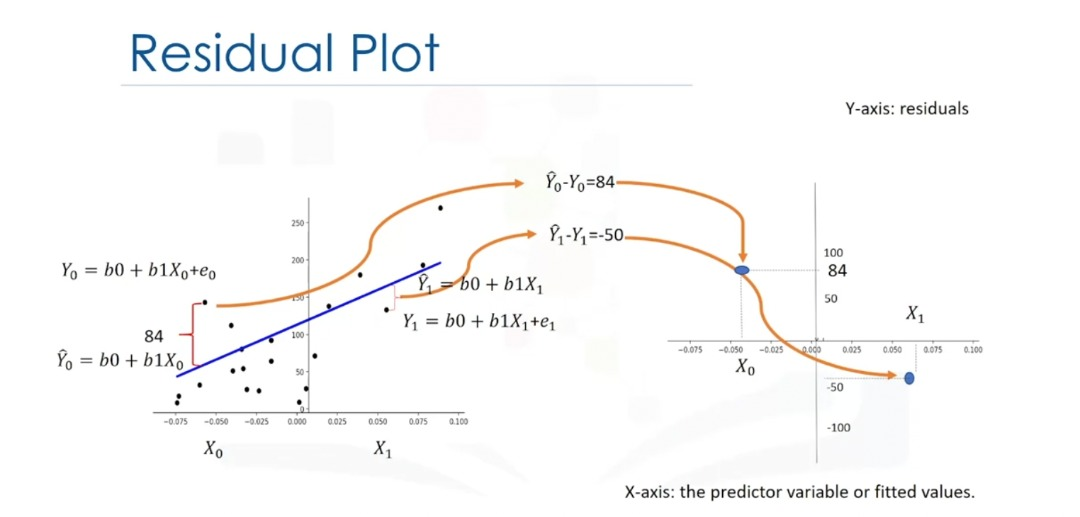

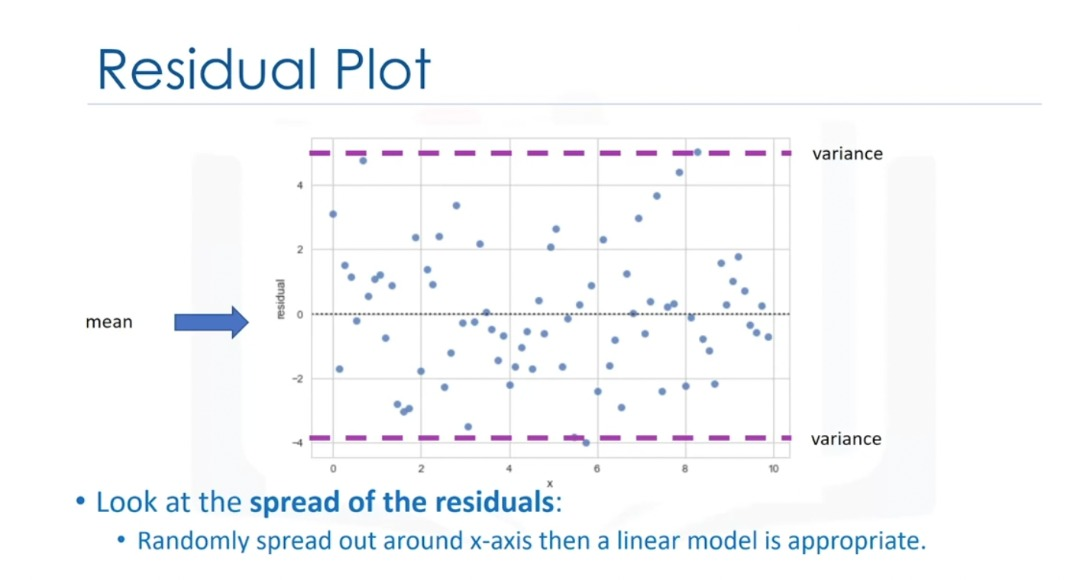

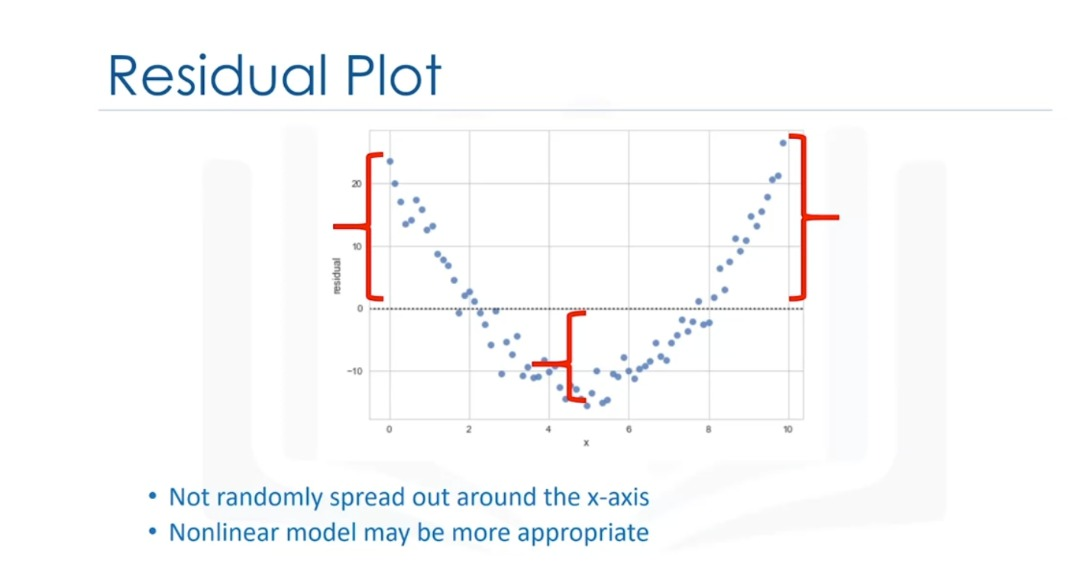

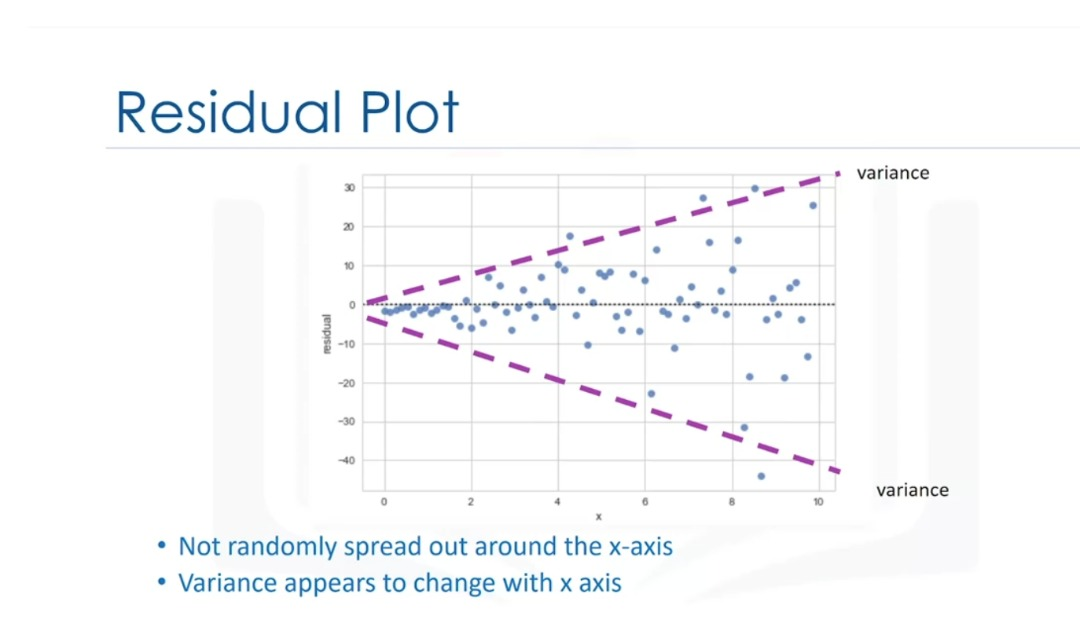



To do the residual plot 

import seaborn as sns

sns.residplot(df['highway-mpg'],df['price'])

######  Distribution plots

Distribution plot count the predicted value vs the actual value.

It is extremely useful for visualizing model with more than one independent variables od featurs

code to create a distribution plots

import seaborn as sns

ax1 = sns.displot(df['price'],hist = False,color = "r",label = "Actual Value")

sns.distplot(Yhat,hist = False,color = "blue",label = "Fitted values",ax = ax1)






###### Polynomial Regression and Pipelines

What do we do if the linaer regression is not best fit for our data?

first to do polynomial regression, we first transform our data into a polynomial then will use linear regression to fit the parameter then will use pipelines

PiPelines:
it is a way to simplyfy the code


###### Polynomial Regression 

* A special case of the general linear regression model
* Useful for describing curvilinear relationships


Curvilinear relationships is what we get by squaring or setting higher-order terms of the predictor variables in the model
transforming the data.


model can be Quadratic = 2nd order

Y = b0 + b1x1 + b2(x1)^2

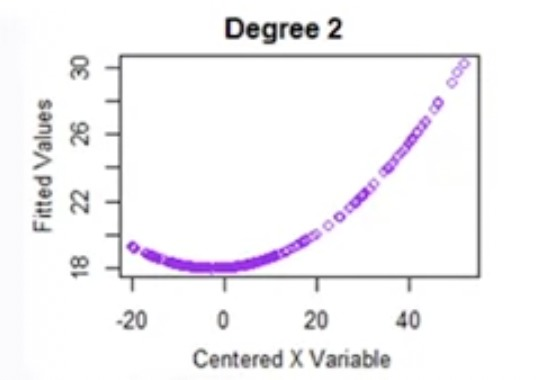


model can be cubic = 3rd order

Y = b0 + b1x1 + b2(x1)^2 + b3(x3)^3

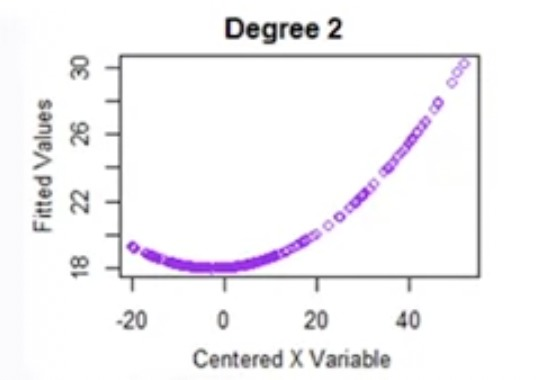


There also exits higher order polynomial Regression when good fit cannot be achieved by 2nd or 3rd order

Y = b0 + b1x1 + b2(x1)^2 + b3(x3)^3 + ........

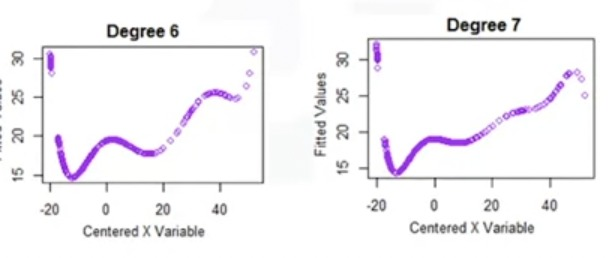


Lets create a 3rd order polynomial

f = np.ployfit(x,y,3)

p = np.polyld(f)

we can print out the model

print(p)


Symbolic model are given

-1.557(x1)^3 + 204.8(x1)^2 + 8965x1 + 1.37 * 10^5


* We can also have multi dimensional polynomial linear regression

Y = b0 + b1X1 + b2X2 + b3X1X2 + b4(X1)^2 + b5(x2)^2 +.....


using numbpy cannot do this regression so we use the preprocessing library in scikit learn 

from sklearn.preprocessing import PolynomialFeatures

pr = PolynomialFeatures(degree = 2,include_bias =False)


As the dimension of the data get larger we may want to normalize multiple features in skitlearn instead we can use preprocessing module to simplefy many tasks


* For example we can normalize the each features simultaneously

from sklearn.preprocessing import StandardScaler

Scale = standardScaler()

Scale.fit(x_data[['horsepower','highway-mpg']])


x_scale = Scale.tranform(x_data[['horsepower','highway-mpg']])



*we can also simplyfy our code using pipelines library


There are many steps to getting a prediction

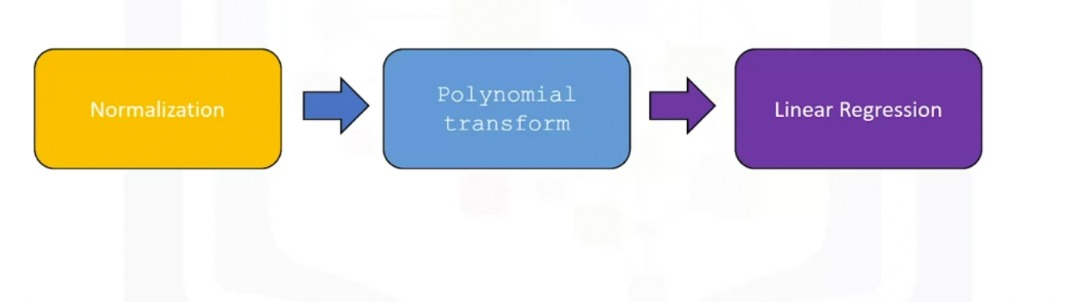


we simplyfy the process using pipelines

pipelines sequentially perform a series of tranformation and last steps carried out the prediction

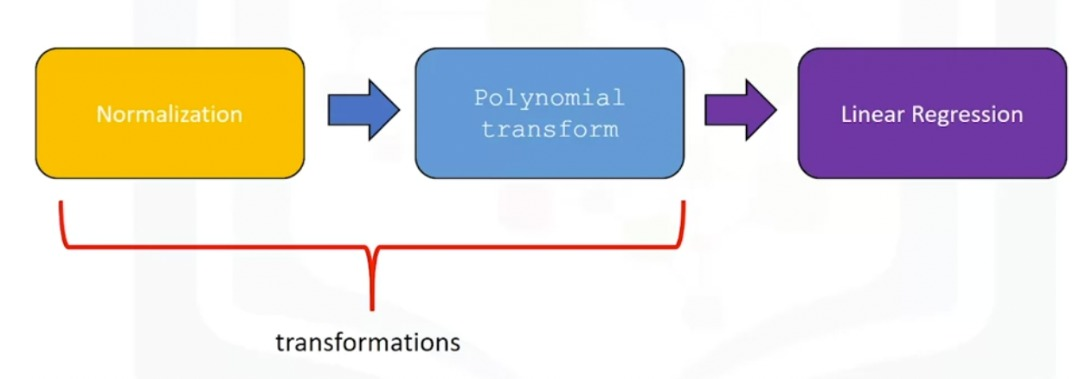


from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import pipeline


input = [('scale',StandardScaler()),('polynomial',PolynomialFeatures(degree=2),('model',LinearRegression())]



* we input the list in Pipeline constructor

    pipe = Pipeline(input)

now we have pipeline object


* we can train the pipeline object by applying th train method to the pipeline object

    Pipe.fit(df[['horsepower','curb-weight','engine-size','highway-mpg']],y)


* we can also produce a prediction as well

yhat = Pipe.predict(X[['horsepower','curb-weight','engine-size','highway-mpg']])

###### Measure for In-Sample Evalution
To find Mean Square Error (MSE)

from sklearn.matrics import mean_squared_error
mean_squared_error (df['price'],Y_predict_simple_fit)

3163502.944639888

###### Coefficient of Determination (R^2)

R^2 (1 - (Mse of the regression line / Mse of the average of the data)


* Generally the values of the MSE are between 0 and 1
* We can calculate the R^2 as follows

    x = df[['highway-mpg']]
    y = df['price']
    
    lm.fit(x,y)
    
    lm.score(x,y)
    
    0.496591188
    
    